In [1]:
import os
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code') 
# We position ourselves in the directory where the main classes are located.
print(f" You are currently in the directory: {os.getcwd()}")

 You are currently in the directory: /Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/code


In [2]:
from Zoro import *
from functions import *
from help_function import Help_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy

In [3]:
mpl.style.use('seaborn')

In [4]:
# problem set up
n = 2000
s = int(0.1*n)
noiseamp = 0.001 # noise amplitude
obj_func = SparseQuadric(n, s, noiseamp)

# Choose initialization
x0    = np.random.randn(n)
x0    = 100*x0/np.linalg.norm(x0)
xx0   = copy.deepcopy(x0)

sparsity = s
#sparsity = int(0.1*len(x0)) # This is a decent default, if no better estimate is known. 

# Parameters for ZORO. Defaults are fine in most cases
params = {"step_size":1.0, "delta": 0.0001, "max_cosamp_iter": 10, 
          "cosamp_tol": 0.5,"sparsity": sparsity,
          "num_samples": int(np.ceil(np.log(len(x0))*sparsity))}

performance_log_ZORO = [[0, obj_func(x0)]]

In [5]:
opt  = ZORO(x0, obj_func, params, function_budget= int(1e6))

# the actual optimization routine
termination=False

Estimated f(x_k): 905.763027  function evals: 3042
Estimated f(x_k): 686.835746  function evals: 6084
Estimated f(x_k): 657.171282  function evals: 9126
Estimated f(x_k): 633.951592  function evals: 12168
Estimated f(x_k): 622.957324  function evals: 15210
Estimated f(x_k): 610.664123  function evals: 18252
Estimated f(x_k): 595.817413  function evals: 21294
Estimated f(x_k): 582.595052  function evals: 24336
Estimated f(x_k): 571.418502  function evals: 27378
Estimated f(x_k): 556.467663  function evals: 30420
Estimated f(x_k): 553.794848  function evals: 33462
Estimated f(x_k): 539.710099  function evals: 36504
Estimated f(x_k): 534.558310  function evals: 39546
Estimated f(x_k): 519.422212  function evals: 42588
Estimated f(x_k): 514.120405  function evals: 45630
Estimated f(x_k): 498.533437  function evals: 48672
Estimated f(x_k): 488.974745  function evals: 51714
Estimated f(x_k): 475.898370  function evals: 54756
Estimated f(x_k): 469.875638  function evals: 57798
Estimated f(x_k

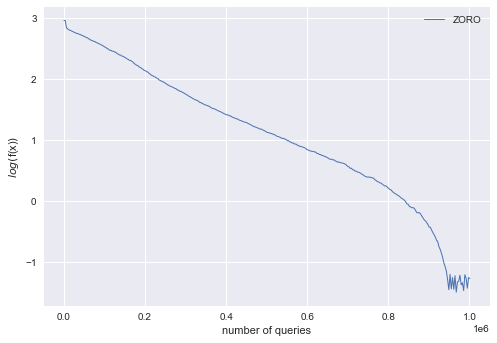

In [6]:
performance_log_ZORO=opt.Zoro()
fig, ax = plt.subplots()
ax.plot(np.array(performance_log_ZORO)[:,0],
 np.log10(np.array(performance_log_ZORO)[:,1]), linewidth=1, label = "ZORO")
plt.xlabel('number of queries')
plt.ylabel('$log($f(x)$)$')
leg = ax.legend()
plt.show()